<center><h1>QBUS6860 - Visual Data Analytics</h1></center>

In this tutorial we explore the basics of how to use the pandas package to work efficiently with data in Python. 

There's a useful tutorial called <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html" target="_blank">10 minutes to pandas</a> in the official pandas documentation, which is a good starting point for working with the data.

# Importing a package

We import packages in Python using the syntax 'import PAKCAGE_NAME'
We can also use the syntax "import PACKAGE_NAME as SHORT_NAME' to give the package a more convient or shorter nickname

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Part 1: Import the Data

We will use the Credit.csv dataset. It records the average credit card balace at end of the month for customers of a financial services company, as well as other individual characteristics such age, education, gender, marital status, number of cards, and credit rating.

## pandas.read_csv function

The function takes a string as an argument and that string should be the full file path of the CSV file and returns a pandas **DataFrame**

In [8]:
path_data = 'Credit.csv'
data = pd.read_csv(path_data, index_col='Obs')
data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138


## Accessing the columns

We can access the various columns of data by writing: `name_of_dataframe.name_of_column`

In [9]:
data.Income

Obs
1       14.891
2      106.025
3      104.593
4      148.924
5       55.882
        ...   
396     12.096
397     13.364
398     57.872
399     37.728
400     18.701
Name: Income, Length: 400, dtype: float64

## The 'head' and 'tail' functions

The `head` function by default prints the top 5 lines of the DataFrame and `tail` function by default prints the bottom 5 lines

In [10]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


- we can change the number of lines `head` displays by giving it an argument of the number of lines we want it to display

In [11]:
data.tail()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


# Part 2: Slice & Dice the Data

## Access specific columns

In [12]:
data['Income']

Obs
1       14.891
2      106.025
3      104.593
4      148.924
5       55.882
        ...   
396     12.096
397     13.364
398     57.872
399     37.728
400     18.701
Name: Income, Length: 400, dtype: float64

We can select multiple columns of data

In [13]:
s1 = data[['Income','Education']]
s1.head()

,Income,Education
Obs,,
1,14.891,11
2,106.025,15
3,104.593,11
4,148.924,11
5,55.882,16


In [14]:
cols_to_select = ['Student', 'Balance']
s2 = data[cols_to_select]
s2.head()

,Student,Balance
Obs,,
1,No,333
2,Yes,903
3,No,580
4,No,964
5,No,331


## Conditional selection

We can filter the data according to our needs

In [15]:
# first we find all the elements where 'Gender' is 'Male'
gender_is_male = data['Gender'] == ' Male'
print(gender_is_male.head())

Obs
1     True
2    False
3     True
4    False
5     True
Name: Gender, dtype: bool


In [16]:
balance_for_males = data.loc[gender_is_male,'Balance'].head()
balance_for_males

Obs
1     333
3     580
5     331
6    1151
8     872
Name: Balance, dtype: int64

We can then introduce the function `mean` which takes the average over the rows:

In [17]:
balance_for_males.mean()

653.4

You can also specify multiple conditions. The following selects females with age equal or lower than 30

In [18]:
# first, find all observation where 'Gender' is 'Female'
gender_is_female = data['Gender'] == 'Female'
print(gender_is_female.head())

Obs
1    False
2     True
3    False
4     True
5    False
Name: Gender, dtype: bool


In [19]:
# then, find all observation where 'Age' is less than or equal to 30
age_lte_30 = data['Age'] <=30
print(age_lte_30.head())

Obs
1    False
2    False
3    False
4    False
5    False
Name: Age, dtype: bool


In [20]:
our_new_selection = gender_is_female & age_lte_30
print(our_new_selection.head())

Obs
1    False
2    False
3    False
4    False
5    False
dtype: bool


In [21]:
data_selection = data.loc[our_new_selection, 'Balance']
print(data_selection)

Obs
19      891
26      671
35        0
39      531
44      976
45     1120
66      602
78      145
114     768
125       0
151     581
153     156
179     453
184       0
186     450
226    1075
236     191
268     942
272     436
273     728
322      81
336     194
Name: Balance, dtype: int64


In [22]:
data_selection.mean()

499.59090909090907

# Assigning new values to a data selection

You may have noted that the first character in "Male" above is a space. This is an unintentional error in the data. The unique method in pandas allows us to view all the unique values in a column. In this case, it confirms that all entries are like this.   

In [23]:
data['Gender'].unique()

array([' Male', 'Female'], dtype=object)

We can use our data selection knowledge to fix this. Below, we joinly select the rows in which the gender is " Male" and the Gender column.  We then replace the values in those locations with the correct label. 

In [24]:
gender_is_male = data['Gender'] ==' Male'
data.loc[gender_is_male,'Gender'] = 'Male'
data.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


# Part 3: Descriptive statistics

After loading and preparing the data, we can start exploring it by looking at the basic descriptive statitistics. The <TT>describe</TT> method provides a table with basic summary statitics for the data.  

In [25]:
data.describe().round(1) # here I appended round to limit the number of decimal places in the display, try without it

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.0,400.0,400.0,400.0,400.0,400.0,400.0
mean,45.2,4735.6,354.9,3.0,55.7,13.4,520.0
std,35.2,2308.2,154.7,1.4,17.2,3.1,459.8
min,10.4,855.0,93.0,1.0,23.0,5.0,0.0
25%,21.0,3088.0,247.2,2.0,41.8,11.0,68.8
50%,33.1,4622.5,344.0,3.0,56.0,14.0,459.5
75%,57.5,5872.8,437.2,4.0,70.0,16.0,863.0
max,186.6,13913.0,982.0,9.0,98.0,20.0,1999.0


In [26]:
data.mean().round(2)

Income         45.22
Limit        4735.60
Rating        354.94
Cards           2.96
Age            55.67
Education      13.45
Balance       520.02
dtype: float64

In [27]:
data[['Income','Education']].corr().round(2)

,Income,Education
Income,1.00,-0.03
Education,-0.03,1.00


# Part 4: Plotting a boxplot for the distribution of salary by gender

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
income_for_males = data.loc[gender_is_male,'Income']
income_for_males.mean()

45.610316062176175

In [30]:
income_for_males.min()

10.354000000000001

In [31]:
income_for_males.max()

182.72799999999998

In [32]:
income_for_females = data.loc[gender_is_female,'Income']
income_for_females.mean()

44.85392753623185

In [33]:
income_for_females.min()

10.363

In [34]:
income_for_females.max()

186.63400000000001

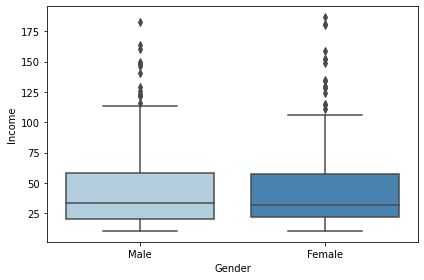

In [35]:
sns.boxplot(x='Gender', y='Income', data=data, palette='Blues')
plt.tight_layout()
plt.show()

# Part 5: Practice Exercise

1. What is the median age of married females in the dataset?

In [30]:
# insert your code here

married_female = data#[(your 1st condition here) & (your 2nd condition here)]
#code to print out median age

2. How many students are >=45 y.o. grouped by the ethnicity?

In [31]:
# insert your code here

students_above_45 = data#[(your 1st condition here) & (your 2nd condition here)]
#code to print out dataset grouped by ethnicity